In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [27]:

Physician = pd.read_csv('Performance_Scores.csv')
Patient = pd.read_csv('Physician_Compare_2015_Group_Public_Reporting_-_Patient_Experience.csv')


In [18]:
Physician.head()

,Organization legal name or 'doing business as' name,Group PAC ID,State,Participating in PQRS,Measure Identifier,Measure Title,Inverse Measure,Measure Performance Rate,Footnote,Reporting Mechanism,Reported on PC Live Site
0,GLEN BURNIE PHYSICAL THERAPY AND SPORTSCARE LLC,42102592,MD,NaN,PQRS_GRP_131_1,Pain Assessment and Follow-Up,N,99.0,NaN,REG,Y
1,GLEN BURNIE PHYSICAL THERAPY AND SPORTSCARE LLC,42102592,MD,NaN,PQRS_GRP_154_1,Falls: Risk Assessment,N,77.0,NaN,REG,Y
2,GLEN BURNIE PHYSICAL THERAPY AND SPORTSCARE LLC,42102592,MD,NaN,PQRS_GRP_155_1,Falls: Plan of Care,N,88.0,NaN,REG,Y
3,GLEN BURNIE PHYSICAL THERAPY AND SPORTSCARE LLC,42102592,MD,NaN,PQRS_GRP_182_1,Functional Outcome Assessment,N,100.0,NaN,REG,Y
4,HERITAGE VALLEY MEDICAL GROUP INC,42105678,PA,Y,PQRS_GRP_110_1,Preventive Care and Screening: Influenza Immun...,N,62.0,NaN,WI,Y


In [28]:
df = pd.DataFrame(Physician)
Patient = pd.DataFrame(Patient)

In [20]:
df.shape

(11117, 11)

In [21]:
df['Measure Performance Rate'].describe()

count    10671.000000
mean        70.656171
std         31.392991
min          0.000000
25%         53.000000
50%         82.000000
75%         97.000000
max        100.000000
Name: Measure Performance Rate, dtype: float64

In [24]:
total = df.isnull().sum().sort_values(ascending=False)
percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
Footnote,10671,1.000000
Participating in PQRS,390,0.036548
Reported on PC Live Site,0,0.000000
Reporting Mechanism,0,0.000000
Measure Performance Rate,0,0.000000
Inverse Measure,0,0.000000
Measure Title,0,0.000000
Measure Identifier,0,0.000000
State,0,0.000000
Group PAC ID,0,0.000000


In [23]:
df = df.dropna(subset=['Measure Performance Rate']) 

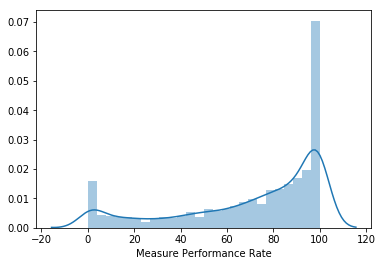

In [26]:
#Here we are making a distribution plot of measure performance rate by patient experience

sns.distplot(df['Measure Performance Rate']);

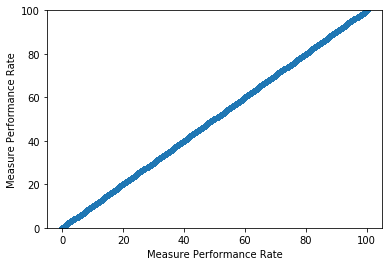

In [41]:
var = 'Measure Performance Rate'
data = pd.concat([Patient['Measure Performance Rate'], df[var]], axis=1)
data.plot.scatter(x=var, y='Measure Performance Rate', ylim=(0,100));